In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S1/Office_Pamela-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 3s 9ms/step - loss: 1156.1405
Epoch 2/300
12/12 [==============================] - 0s 8ms/step - loss: 1105.3615
Epoch 3/300
12/12 [==============================] - 0s 8ms/step - loss: 1065.3492
Epoch 4/300
12/12 [==============================] - 0s 8ms/step - loss: 1032.1545
Epoch 5/300
12/12 [==============================] - 0s 8ms/step - loss: 1000.0208
Epoch 6/300
12/12 [==============================] - 0s 10ms/step - loss: 963.9268
Epoch 7/300
12/12 [==============================] - 0s 8ms/step - loss: 919.7065
Epoch 8/300
12/12 [==============================] - 0s 8ms/step - loss: 878.3865
Epoch 9/300
12/12 [==============================] - 0s 8ms/step - loss: 837.0677
Epoch 10/300
12/12 [==============================] - 0s 8ms/step - loss: 799.1865
Epoch 11/300
12/12 [==============================] - 0s 8ms/step - loss: 772.7969
Epoch 12/300
12/12 [==============================] - 0s 8ms/step - loss: 752.0087
Epoch 1

In [13]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [17]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 3.763264140320436
Root Mean Squared Error for RNN Model for testing is: 4.029508130569752
Mean Absolute Error for RNN Model for training is: 2.822310599329201
Mean Absolute Error for RNN Model for testing is: 2.95261893001374
MAPE for RNN Model for training is: 0.09149166501465206
MAPE for RNN Model for testing is: 0.10043423183418203


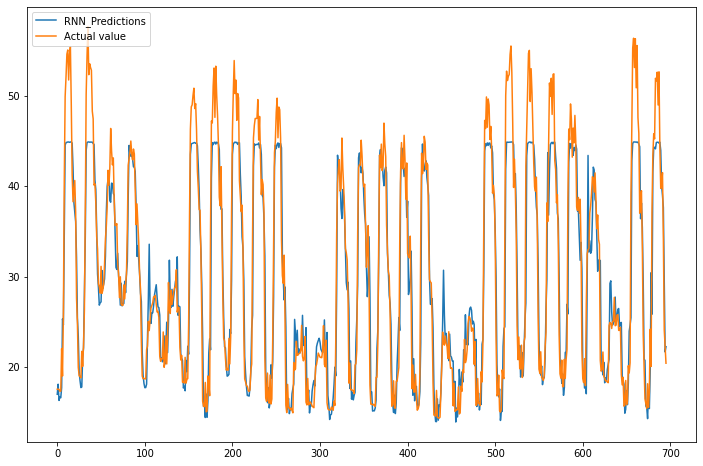

In [18]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([17.54166667]), array([16.982653], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.55901401]), array([-0.54579086]), array([1.20466817]), array([0.62345798]), array([0.72950299]), array([4.32708028]), array([-6.31804848]), array([1.26685422]), array([5.34018097]), array([5.35588481]), array([7.28678258]), array([9.74356029]), array([10.17578201]), array([6.85646794]), array([9.75620804]), array([10.54243342]), array([4.18813808]), array([-3.44885356]), array([-3.76495514]), array([1.3331398]), array([3.50066173]), array([1.02761612]), array([-4.51288605]), array([-0.59628474]), array([-3.4156367]), array([-0.46821175]), array([0.4559948]), array([1.07909279]), array([3.94580243]), array([-1.00484746]), array([0.30813866]), array([-2.29332822]), array([2.97831065]), array([6.19574966]), array([9.57666804]), array([12.75226593]), array([7.4317866]), array([8.67172089]), array([8.24182103]), array([7.93733673]), array([3.42414906]), array([2.7269048]), array([-4.50778224]), array([-0.40069554]), array([-1.4700826]), array([-0.88311717]), array([2.76573817]), a

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([15.18642044]), array([-11.08050817]))

In [22]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [23]:
len(neg),len(pos)

(309, 387)